# Notebook de desenvolvimento


## 1. Definir esquema de base de dados e as tabelas

- funções iniciais de criação da base de dados
- 3 examplos de puzzles
- 3 exemplos de soluções
- 1 tabela com tetrominos

https://cemulate.github.io/polyomino-solver/

In [79]:
import sys
sys.path.append("/workspaces/project_tadb_fcup_20242025")
import utils

In [80]:
from utils.puzzles import puzzle_generator

puzzle_generator(puzzle_id=22, width=5, height=6, num_holes=4)

[<POLYGON ((1 2, 2 2, 2 3, 1 3, 1 2))>, <POLYGON ((3 3, 4 3, 4 4, 3 4, 3 3))>, <POLYGON ((1 3, 2 3, 2 4, 1 4, 1 3))>, <POLYGON ((0 4, 1 4, 1 5, 0 5, 0 4))>]
[<POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))>, <POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))>, <POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))>, <POLYGON ((3 0, 4 0, 4 1, 3 1, 3 0))>, <POLYGON ((4 0, 5 0, 5 1, 4 1, 4 0))>, <POLYGON ((5 0, 6 0, 6 1, 5 1, 5 0))>, <POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))>, <POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))>, <POLYGON ((2 1, 3 1, 3 2, 2 2, 2 1))>, <POLYGON ((3 1, 4 1, 4 2, 3 2, 3 1))>, <POLYGON ((4 1, 5 1, 5 2, 4 2, 4 1))>, <POLYGON ((5 1, 6 1, 6 2, 5 2, 5 1))>, <POLYGON ((0 2, 1 2, 1 3, 0 3, 0 2))>, <POLYGON ((2 2, 3 2, 3 3, 2 3, 2 2))>, <POLYGON ((3 2, 4 2, 4 3, 3 3, 3 2))>, <POLYGON ((4 2, 5 2, 5 3, 4 3, 4 2))>, <POLYGON ((5 2, 6 2, 6 3, 5 3, 5 2))>, <POLYGON ((0 3, 1 3, 1 4, 0 4, 0 3))>, <POLYGON ((2 3, 3 3, 3 4, 2 4, 2 3))>, <POLYGON ((4 3, 5 3, 5 4, 4 4, 4 3))>, <POLYGON ((5 3, 6 3, 6 4, 5 4, 5 3))>, <POLYGON ((1 4, 2 4, 2 

True

In [81]:
import psycopg2
import matplotlib.pyplot as plt
from shapely.wkt import loads as wkt_loads
import matplotlib.patches as patches


conn = psycopg2.connect(
            dbname="postgres",
            user="postgres",
            password="postgres",
            host="db",
            connect_timeout=10  # Connection timeout in seconds
        )

cur = conn.cursor()

query = """
SELECT 
    id
    , name
    , ST_AsText(geom) 
FROM puzzles
WHERE id = 22; 
"""

cur.execute(query)
puzzle = cur.fetchall()

geom = puzzle[0][2]
cur.close()
conn.close()


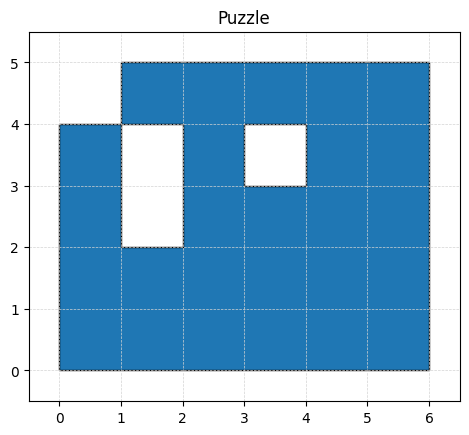

In [ ]:
from utils.plot import plot_geometry

fig1, ax1 = plt.subplots()
plot_geometry( ax=ax1,geom=geom, color="blue",title="Puzzle" )
plt.show()

In [83]:
import psycopg2
import matplotlib.pyplot as plt
from shapely.wkt import loads as wkt_loads
import matplotlib.patches as patches


conn = psycopg2.connect(
            dbname="postgres",
            user="postgres",
            password="postgres",
            host="db",
            connect_timeout=10  # Connection timeout in seconds
        )

cur = conn.cursor()

query = """
SELECT 
    id
    , name
    , ST_AsText(geom) 
FROM puzzles
WHERE id = 1; 
"""

cur.execute(query)
puzzle = cur.fetchall()

geom = puzzle[0][2]
cur.close()
conn.close()


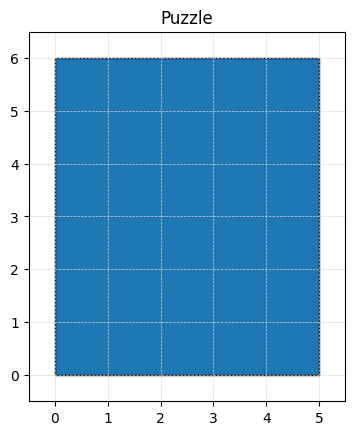

In [84]:
from utils.plot import plot_geometry

fig1, ax1 = plt.subplots()
plot_geometry( ax=ax1,geom=geom, color="blue",title="Puzzle")
plt.show()

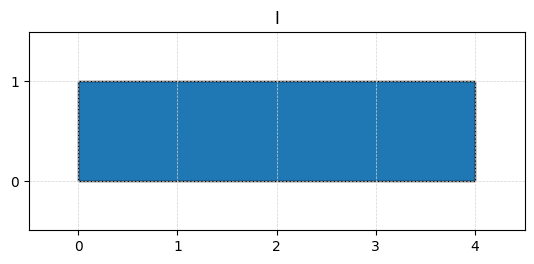

In [85]:
import psycopg2
import matplotlib.pyplot as plt
from shapely.wkt import loads as wkt_loads
import matplotlib.patches as patches


conn = psycopg2.connect(
            dbname="postgres",
            user="postgres",
            password="postgres",
            host="db",
            connect_timeout=10  # Connection timeout in seconds
        )

cur = conn.cursor()

query = """
SELECT 
    letter
    , color
    , ST_AsText(geom) 
FROM tetrominoes 
WHERE LOWER(letter) = 'i'
    AND var_id = 1; 
"""

cur.execute(query)
tetromino = cur.fetchall()

geom = tetromino[0][2]
cur.close()
conn.close()

fig1, ax1 = plt.subplots()
plot_geometry( ax=ax1,geom=tetromino[0][2], color=tetromino[0][1],title=tetromino[0][0])
plt.show()


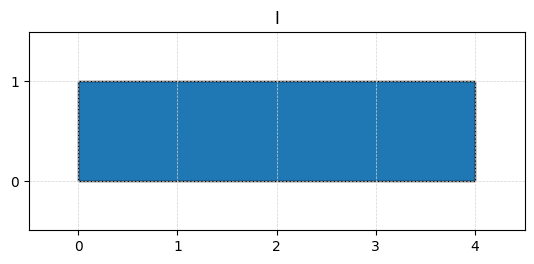

In [12]:
fig1, ax1 = plt.subplots()
plot_geometry( ax=ax1,geom=tetromino[0][2], color=tetromino[0][1],title=tetromino[0][0])
plt.show()

In [86]:
from utils.plot import export_geometry

export_geometry( ax=ax1,geom=geom, color="blue",title="Puzzle", path = "test.png")


Error saving plot to test.png: could not convert string to float: 'test.png'


False

AttributeError: 'MultiPolygon' object has no attribute 'exterior'

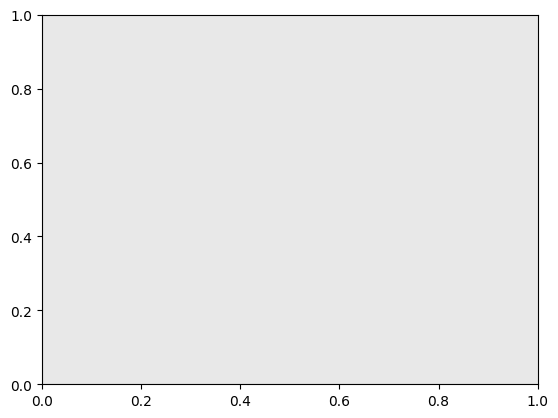

In [87]:
from utils.plot import plot_solutions

plot_solutions( puzzle_id=1, title="Puzzle 1 Solutions", solution_id=1 )
plt.show()

AttributeError: 'MultiPolygon' object has no attribute 'exterior'

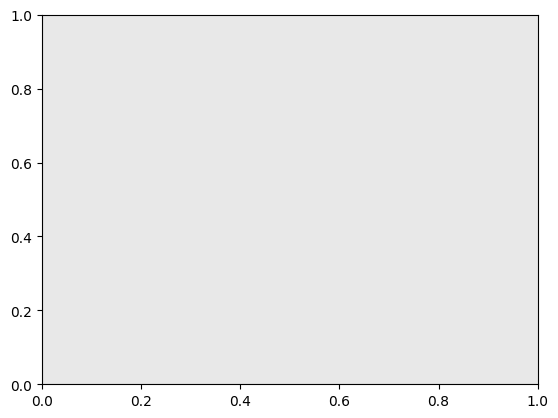

In [88]:
from utils.plot import plot_solutions

plot_solutions( puzzle_id=2, title="Puzzle 2 Solutions", solution_id=1 )
plt.show()

AttributeError: 'MultiPolygon' object has no attribute 'exterior'

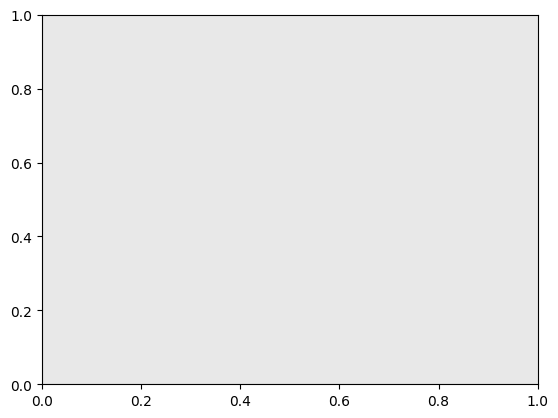

In [89]:
from utils.plot import plot_solutions

plot_solutions( puzzle_id=3, title="Puzzle 3 Solutions", solution_id=1 )
plt.show()